In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_laurent2016
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [2]:
# load in the data from the provided examples
data, bb = load_laurent2016()

In [3]:
rotation = [-69.11979675292969, 15.704944610595703, 6.00014591217041]

### Modelling S2

In [4]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
s2 = model.create_and_add_fold_frame('s2',
                                     nelements=10000)



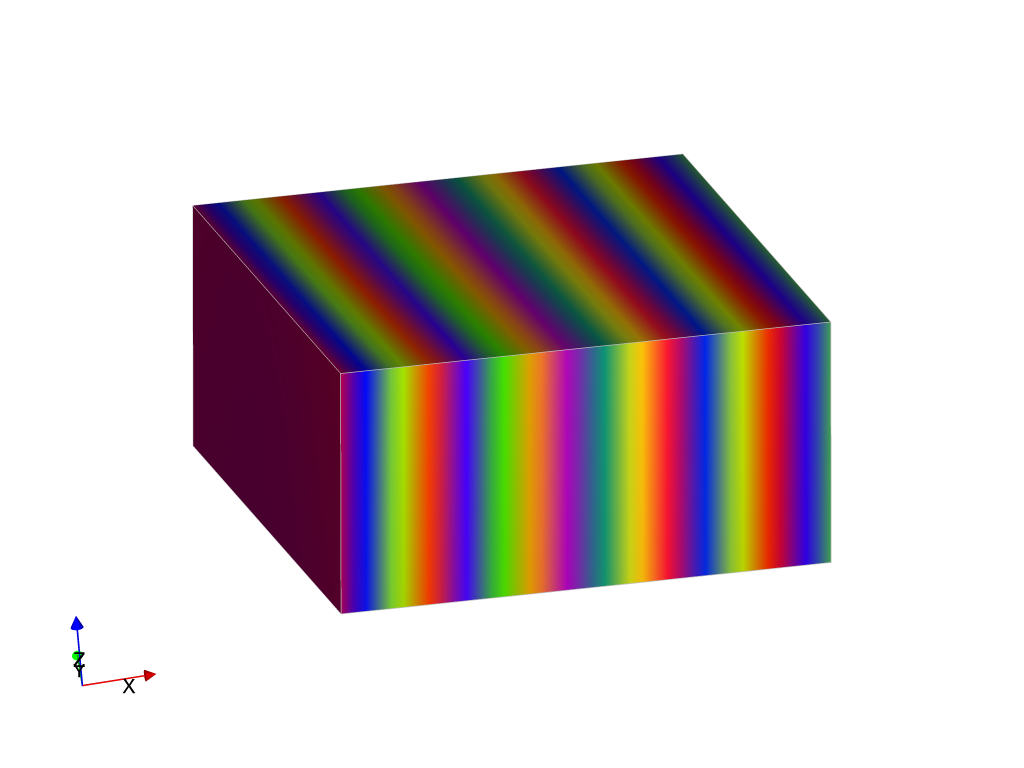

In [5]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s2['feature'][0],
                       cmap='prism')
viewer.rotate(rotation)
viewer.display()

### Modelling S1

In [6]:
s1 = model.create_and_add_folded_fold_frame('s1',
                                            limb_wl=.4, 
                                            av_fold_axis=True,
                                            nelements=50000
                                           )



/home/lgrose/python_venv/LoopStructural/lib/python3.6/site-packages/pyamg/krylov/_cg.py:140: UserWarning: 
Indefinite matrix detected in CG, aborting

  warn("\nIndefinite matrix detected in CG, aborting\n")



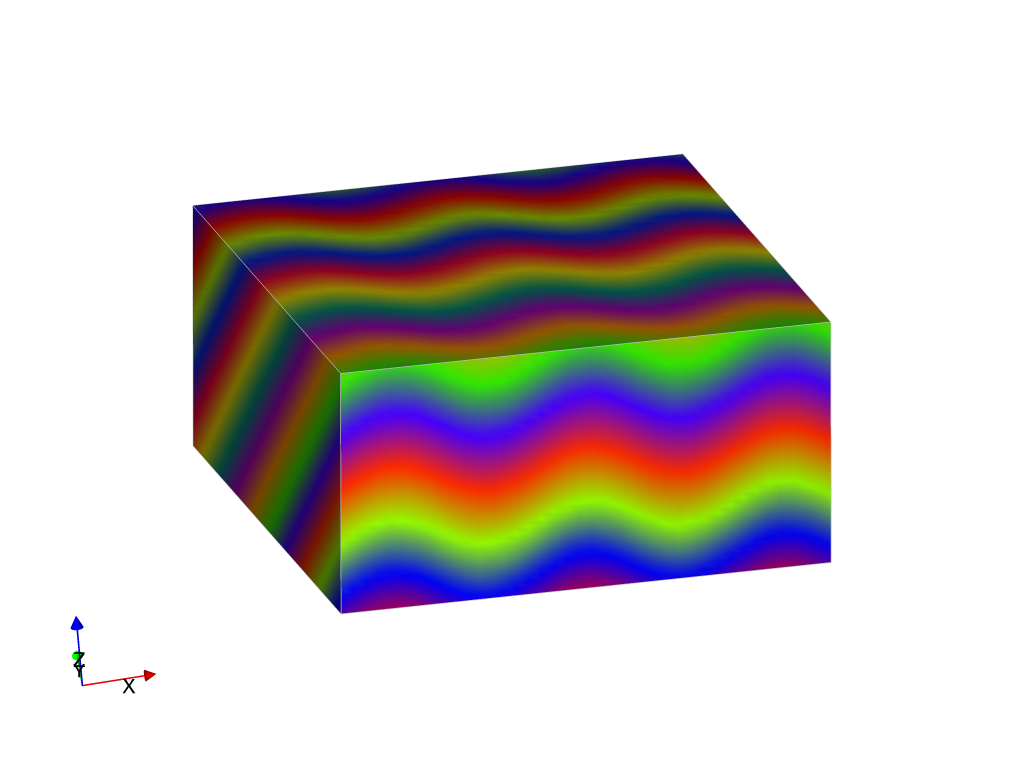

KeyError: 'limb_svariogram'

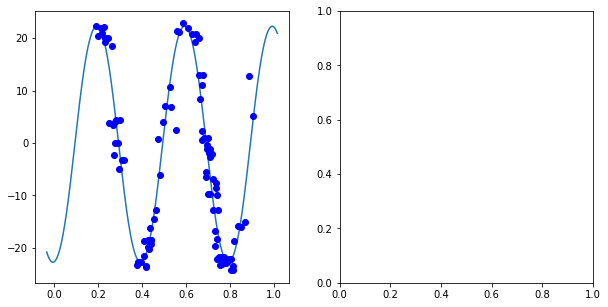

In [7]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s1['feature'][0],
                       cmap='prism')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()

fig, ax = plt.subplots(1,2,figsize=(10,5))
x = np.linspace(s2['feature'][0].min(),s2['feature'][0].max(),1000)
ax[0].plot(x,s1['fold'].fold_limb_rotation(x))
ax[0].plot(s1['foliation'],s1['limb_rotation'],'bo')
ax[1].plot(s1['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')

### Modelling S0

In [8]:
s0 = model.create_and_add_folded_fold_frame('s0',
                                            limb_wl=1., 
                                            av_fold_axis=True,
                                            nelements=50000
                                           )


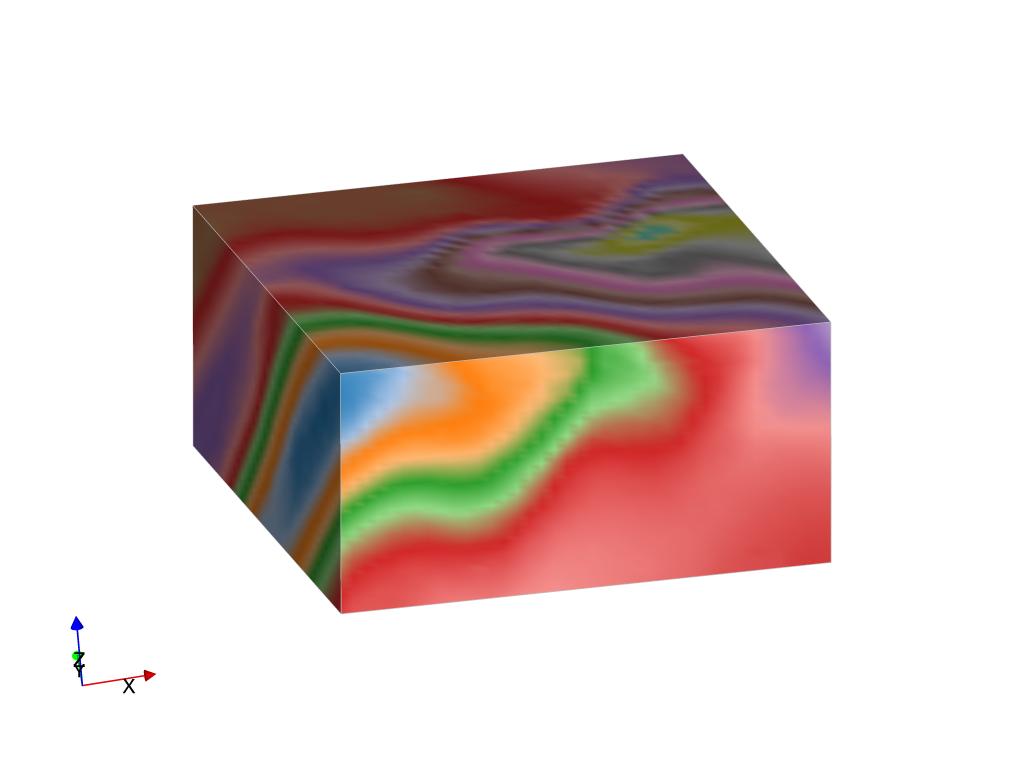

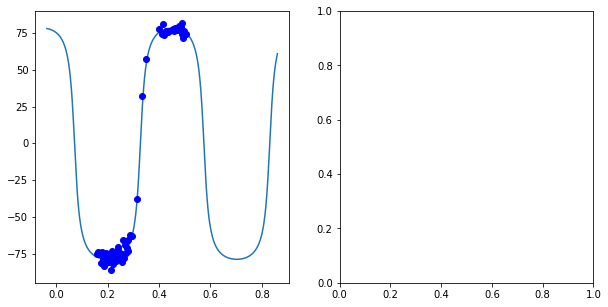

In [10]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s0['feature'][0],
                       cmap='tab20')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()

fig, ax = plt.subplots(1,2,figsize=(10,5))
x = np.linspace(s1['feature'][0].min(),s1['feature'][0].max(),1000)
ax[0].plot(x,s0['fold'].fold_limb_rotation(x))
ax[0].plot(s0['foliation'],s0['limb_rotation'],'bo')
# ax[1].plot(s0['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')